In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [72]:
data = pd.read_csv('final_query.csv')

In [73]:
data.sample()

,flight_id,city_departure,city_arrival,model,range,total_cost_of_tickets,flight_duration_minutes,scheduled_departure,number_of_tickets,n_busines,common_n_b_class_seats,n_economy,common_n_e_class_seats,flight_delay
66,136560,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,305,2017-01-24 06:10:00+00,0,NaN,12,NaN,118,00:03:00


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   city_departure           127 non-null    object 
 2   city_arrival             127 non-null    object 
 3   model                    127 non-null    object 
 4   range                    127 non-null    int64  
 5   total_cost_of_tickets    118 non-null    float64
 6   flight_duration_minutes  127 non-null    int64  
 7   scheduled_departure      127 non-null    object 
 8   number_of_tickets        127 non-null    int64  
 9   n_busines                118 non-null    float64
 10  common_n_b_class_seats   127 non-null    int64  
 11  n_economy                118 non-null    float64
 12  common_n_e_class_seats   127 non-null    int64  
 13  flight_delay             127 non-null    object 
dtypes: float64(3), int64(6), o

Имеется 9 пустых значений в колонке `total_cost_of_tickets` - общая стоимость проданных билетов, значит нет возможности посчитать прибыль для этих рейсов. В колонках `n_busines` - количество проданных билетов в бизнесс-класс и `n_economy` - количество проданных билетов в эконом-класс тоже по 9 пропусков. Это закономерно, поскольку все эти три колонки извлекались из одной и той-же колонки в базе данных. 

Посмотрим, что это за рейсы.

In [75]:
data[data.total_cost_of_tickets.isna() == True]

,flight_id,city_departure,city_arrival,model,range,total_cost_of_tickets,flight_duration_minutes,scheduled_departure,number_of_tickets,n_busines,common_n_b_class_seats,n_economy,common_n_e_class_seats,flight_delay
59,136511,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,310,2017-02-21 06:10:00+00,0,NaN,12,NaN,118,00:05:00
60,136513,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,310,2017-02-28 06:10:00+00,0,NaN,12,NaN,118,00:03:00
61,136514,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,299,2017-02-07 06:10:00+00,0,NaN,12,NaN,118,00:04:00
62,136523,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,312,2017-01-10 06:10:00+00,0,NaN,12,NaN,118,00:04:00
63,136540,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,307,2017-01-17 06:10:00+00,0,NaN,12,NaN,118,00:04:00
64,136544,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,304,2017-01-31 06:10:00+00,0,NaN,12,NaN,118,00:00:00
65,136546,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,302,2017-01-03 06:10:00+00,0,NaN,12,NaN,118,00:03:00
66,136560,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,305,2017-01-24 06:10:00+00,0,NaN,12,NaN,118,00:03:00
67,136567,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,311,2017-02-14 06:10:00+00,0,NaN,12,NaN,118,00:02:00


Все пропущенные значения для города Новокузнецк.

Есть-ли вообще данные по ценам за билеты для Новокузнецка?

In [76]:
display(len(data[data['city_arrival'] == 'Novokuznetsk']))
data[data['city_arrival'] == 'Novokuznetsk']

9

,flight_id,city_departure,city_arrival,model,range,total_cost_of_tickets,flight_duration_minutes,scheduled_departure,number_of_tickets,n_busines,common_n_b_class_seats,n_economy,common_n_e_class_seats,flight_delay
59,136511,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,310,2017-02-21 06:10:00+00,0,NaN,12,NaN,118,00:05:00
60,136513,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,310,2017-02-28 06:10:00+00,0,NaN,12,NaN,118,00:03:00
61,136514,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,299,2017-02-07 06:10:00+00,0,NaN,12,NaN,118,00:04:00
62,136523,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,312,2017-01-10 06:10:00+00,0,NaN,12,NaN,118,00:04:00
63,136540,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,307,2017-01-17 06:10:00+00,0,NaN,12,NaN,118,00:04:00
64,136544,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,304,2017-01-31 06:10:00+00,0,NaN,12,NaN,118,00:00:00
65,136546,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,302,2017-01-03 06:10:00+00,0,NaN,12,NaN,118,00:03:00
66,136560,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,305,2017-01-24 06:10:00+00,0,NaN,12,NaN,118,00:03:00
67,136567,Anapa,Novokuznetsk,Boeing 737-300,4200,NaN,311,2017-02-14 06:10:00+00,0,NaN,12,NaN,118,00:02:00


Для всех девяти рейсов на Новокузнецк нет данных об общей стоимости проданных билетов.  

Следует исключить из анализа эти данные. Очень жаль, нет возможности оценить целое направление.

In [77]:
data.dropna(inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 126
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                118 non-null    int64  
 1   city_departure           118 non-null    object 
 2   city_arrival             118 non-null    object 
 3   model                    118 non-null    object 
 4   range                    118 non-null    int64  
 5   total_cost_of_tickets    118 non-null    float64
 6   flight_duration_minutes  118 non-null    int64  
 7   scheduled_departure      118 non-null    object 
 8   number_of_tickets        118 non-null    int64  
 9   n_busines                118 non-null    float64
 10  common_n_b_class_seats   118 non-null    int64  
 11  n_economy                118 non-null    float64
 12  common_n_e_class_seats   118 non-null    int64  
 13  flight_delay             118 non-null    object 
dtypes: float64(3), int64(6), o

Пропуски удалены.

Колонки `scheduled_departure` и `flight_delay` имеют строковый формат переведём их в дату и время соответственно.

In [79]:
data['scheduled_departure'] = pd.to_datetime(data['scheduled_departure'])
data['flight_delay'] = pd.to_timedelta(data['flight_delay'])

### flight_id
Идентификационный номер рейса. Всего, за зиму 2017 совершено 127 рейсов из Анапы, из них 9 в Новокузнецк, по которым нет данных о стоимости проданных билетов. Все дальнейшие исследования будут проводиться с оставшимися 118 рейсами.

### city_departure
Город вылета по условиям задачи один - Анапа.  

### city_arrival
Город прилёта. Направление.

In [80]:
data.city_arrival.unique()

array(['Moscow', 'Belgorod'], dtype=object)

Итак, у нас имеется два направления, __Москва__ и __Белгород__.

## model
Модель самолёта.

In [81]:
data.model.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

На указанных направлениях используются две модели самолётов: __Boeing 737-300__ и __Sukhoi Superjet-100__. 

Посмотрим, как связаны между собой модель самолёта и направление.

In [82]:
data[data.city_arrival == 'Moscow'].model.unique()

array(['Boeing 737-300'], dtype=object)

В Москву из Анапы зимой летают только Боинги.

In [83]:
data[data.city_arrival == 'Belgorod'].model.unique()

array(['Sukhoi Superjet-100'], dtype=object)

А в Белгород только самолёты Сухого.  
М.б. Сухой не может долететь до Москвы? Не хватает дальности полёта.  
Проверим.

### range
Максимальная дальность полёта.

In [84]:
Sukhoi = data[data.model == 'Sukhoi Superjet-100'].range.unique()
Boeing = data[data.model == 'Boeing 737-300'].range.unique()
print(
    f'Максимальная дальность полёта для Boeing 737-300 составляет {Boeing[0]} км.')
print(
    f'Максимальная дальность полёта для Sukhoi Superjet-100 составляет {Sukhoi[0]} км.')

Максимальная дальность полёта для Boeing 737-300 составляет 4200 км.
Максимальная дальность полёта для Sukhoi Superjet-100 составляет 3000 км.


Расстояние от аэропорта Анапы до аэропорта Шереметьево по-прямой 1220 км., в обход Украины 1360 км.   
Запаса дальности полёта Сухого хватило-бы слетать до Москвы и обратно, гипотеза о нехватки дальности оплёта отвергается.  
Расстояние от Анапы до Белгорода в обход Украины 960 км, по прямой 630.

### total_cost_of_tickets
Полная стоимость проданных билелетов на рейсе.
### flight_duration_minutes
Длительность полёта в минутах.

Из этиз двух колонок вычислим прибыль `revenue` введя дополнительные данные.

In [85]:
def month_to_price(month):
    '''take month, return fuel price'''
    if month == 1:
        return 35.59  # price rub/kg

    elif month == 2:
        return 33.39  # price rub/kg


def consumption(model):
    '''take aircraft model, return fuel consumption'''
    if model == 'Sukhoi Superjet-100':
        return 28.333333333333332  # fuel consumption l/m

    elif model == 'Boeing 737-300':
        return 43.333333333333336  # fuel consumption l/m

In [86]:
data['fuel_price'] = data.scheduled_departure.dt.month.apply(
    month_to_price)  # cost of one liter of fuel
data['fuel_consumption'] = data.model.apply(
    consumption)  # fuel consumption, liter/minute
data['fuel_costs'] = data.flight_duration_minutes * data.fuel_consumption * \
    data.fuel_price  # the price of the spent fuel in rubles
data['revenue'] = data.total_cost_of_tickets - data.fuel_costs

In [87]:
data.head()

,flight_id,city_departure,city_arrival,model,range,total_cost_of_tickets,flight_duration_minutes,scheduled_departure,number_of_tickets,n_busines,common_n_b_class_seats,n_economy,common_n_e_class_seats,flight_delay,fuel_price,fuel_consumption,fuel_costs,revenue
0,136119,Anapa,Moscow,Boeing 737-300,4200,1653000.0,101,2017-01-03 10:05:00+00:00,113,11.0,12,102.0,118,00:03:00,35.59,43.333333,155765.566667,1.497234e+06
1,136120,Anapa,Moscow,Boeing 737-300,4200,1605400.0,99,2017-02-24 10:05:00+00:00,109,11.0,12,98.0,118,00:02:00,33.39,43.333333,143243.100000,1.462157e+06
2,136122,Anapa,Moscow,Boeing 737-300,4200,1431000.0,100,2017-01-08 10:05:00+00:00,97,10.0,12,87.0,118,00:03:00,35.59,43.333333,154223.333333,1.276777e+06
3,136130,Anapa,Moscow,Boeing 737-300,4200,1556600.0,99,2017-02-13 10:05:00+00:00,107,10.0,12,97.0,118,00:02:00,33.39,43.333333,143243.100000,1.413357e+06
4,136131,Anapa,Moscow,Boeing 737-300,4200,1812800.0,99,2017-01-28 10:05:00+00:00,124,12.0,12,112.0,118,00:02:00,35.59,43.333333,152681.100000,1.660119e+06


Данные о ценах на топливо взяты с [сайта поставщика топлива](http://www.bato.aero/) аэропорта города Анапа.  
Цена топлива в январе 35.59 тысячи рублей за тонну или рублей за кг и 33.39 тысячи рублей за тонну или рублей за кг в феврале.  
 
Потребление топлива 2600 кг/час для Boeing 737-300 взято [отсюда](https://www.airlines-inform.ru/commercial-aircraft/boeing-737-300.html).  
Расход топлива л/мин таким образом составил 43.333333333333336.  

Потребление топлива 1700 кг/час для Sukhoi Superjet-100 взято [отсюда](http://superjet.wikidot.com/wiki:rashod-topliva).   Расход топлива л/мин таким образом составил 28.333333333333332.

Стоимость потраченного топлива расчитана как произведение длительности полёта в минутах на расход топлива в л/мин, на цену за литр топлива.   
Прибыль расчитана как стоимость проданных билетов за вычетом цены потраченного топлива. 

In [88]:
len(data[data['revenue'] < 0]) # number of unprofitable flights  

0

Получается что при текущем расчёте прибыли в датасете нет откровенно убыточных рейсов.  
Однако на [указанном сайте](http://www.bato.aero/), есть информация о тарифах на услуги для клиентов аэропортов, из которой следует, что помимо цены за топливо, с клиемтов взымается плата за заправку воздушного судна и за хранение топлива.  

Тариф за обеспечение заправки воздушного судна авиационным топливом (Анапа) Руб./т 1752,00.  
Тариф за хранение авиационного топлива (Анапа) Руб./т 1913,00.

Думаю стоит учесть эти данные при расчёте затрат для более точного определения прибыли.  
Однако тут есть один нюанс. В бак самолёта заправляется топлива больше, чем он тратит за полёт. Значит мы не можем учесть полную цену по этим дополнительным тарифам. За неимением другой информации оставим этот момент как есть, предположив, что непотраченное топливо сохраняется для следующего рейса, и за его заправку и хранение не приходится платить дважды.   

Следует перерасчитать колонку `fuel_costs` следующим образом, как сумму:  
* цена затраченного топлива = затраченное топливо (произведение длительности полёта (минуты) и расхода топлива (литры/мин)) умножить на цену за литр;
* затраченное топливо в килограммах перевести в тонны, затем умножить на тариф за обеспечение заправки воздушного судна авиационным топливом;
* затраченное топливо в килограммах перевести в тонны, затем умножить на тариф за хранение авиационного топлива.



In [89]:
# the price of the spent fuel in rubles
data['fuel_costs'] = (data.flight_duration_minutes *
                      data.fuel_consumption * data.fuel_price) + \
                     (data.flight_duration_minutes * 
                      data.fuel_consumption * 1752 / 1000) +\
                     (data.flight_duration_minutes * 
                      data.fuel_consumption * 1913 / 1000)
data['revenue'] = data.total_cost_of_tickets - data.fuel_costs

In [90]:
data.head()

,flight_id,city_departure,city_arrival,model,range,total_cost_of_tickets,flight_duration_minutes,scheduled_departure,number_of_tickets,n_busines,common_n_b_class_seats,n_economy,common_n_e_class_seats,flight_delay,fuel_price,fuel_consumption,fuel_costs,revenue
0,136119,Anapa,Moscow,Boeing 737-300,4200,1653000.0,101,2017-01-03 10:05:00+00:00,113,11.0,12,102.0,118,00:03:00,35.59,43.333333,171806.05,1481193.95
1,136120,Anapa,Moscow,Boeing 737-300,4200,1605400.0,99,2017-02-24 10:05:00+00:00,109,11.0,12,98.0,118,00:02:00,33.39,43.333333,158965.95,1446434.05
2,136122,Anapa,Moscow,Boeing 737-300,4200,1431000.0,100,2017-01-08 10:05:00+00:00,97,10.0,12,87.0,118,00:03:00,35.59,43.333333,170105.00,1260895.00
3,136130,Anapa,Moscow,Boeing 737-300,4200,1556600.0,99,2017-02-13 10:05:00+00:00,107,10.0,12,97.0,118,00:02:00,33.39,43.333333,158965.95,1397634.05
4,136131,Anapa,Moscow,Boeing 737-300,4200,1812800.0,99,2017-01-28 10:05:00+00:00,124,12.0,12,112.0,118,00:02:00,35.59,43.333333,168403.95,1644396.05


In [95]:
len(data[data['revenue'] < 0]) # number of unprofitable flights  

0

Опять-же при учёте дополнительных трат на топливо, в датасете нет откровенно убыточных рейсов. 

Посмотрим на распределение прибыли.

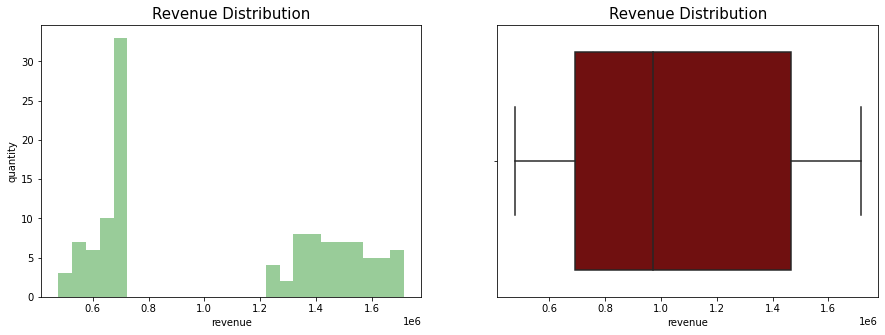

In [91]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
colors = ['g', 'maroon']
sns.distplot(data['revenue'].values, bins=25, color=colors[0], kde=False)
plt.title('Revenue Distribution', fontsize=15)
plt.xlabel('revenue')
plt.ylabel('quantity')

plt.subplot(122)
sns.boxplot(data['revenue'].values, color=colors[1])
plt.title('Revenue Distribution', fontsize=15)
plt.xlabel('revenue')
plt.show()

Видно, что вся выборка делится на две группы по распределению.  
Нужно попробовать разбить распределение по направлениям или моделям самолётов, что в данном случае тождественно.

Посмотрим распределение прибыли по городам.

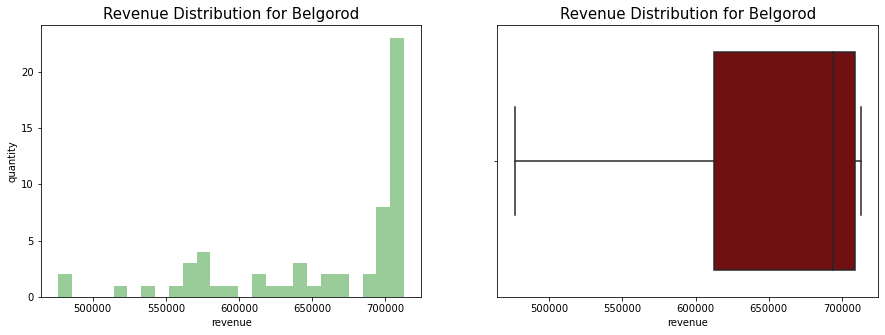

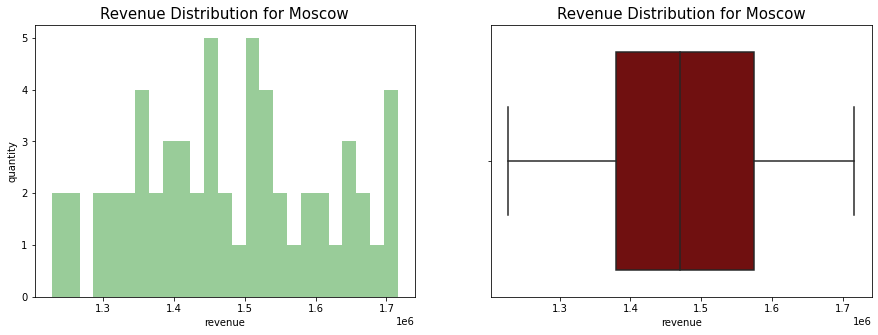

In [93]:
colors = ['g', 'maroon']
for city in (data['city_arrival'].value_counts()).index:
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    section = data[data['city_arrival'] == city]['revenue']
    sns.distplot(section.values, bins=25, color=colors[0], kde=False)
    plt.title(f'Revenue Distribution for {city}', fontsize=15)
    plt.xlabel('revenue')
    plt.ylabel('quantity')

    plt.subplot(122)
    sns.boxplot(section.values, color=colors[1])
    plt.title(f'Revenue Distribution for {city}', fontsize=15)
    plt.xlabel('revenue')
    plt.show()

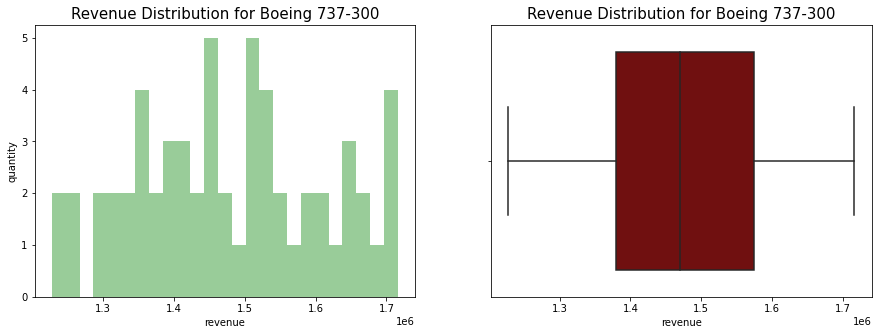

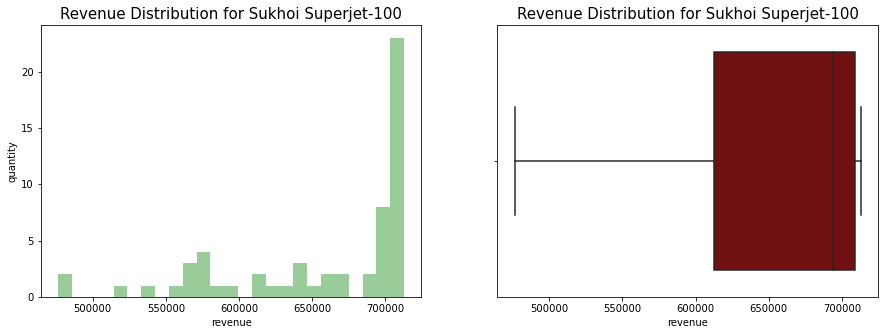

In [94]:
colors = ['g', 'maroon']
for model in (data['model'].value_counts()).index:
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    section = data[data['model'] == model]['revenue']
    sns.distplot(section.values, bins=25, color=colors[0], kde=False)
    plt.title(f'Revenue Distribution for {model}', fontsize=15)
    plt.xlabel('revenue')
    plt.ylabel('quantity')

    plt.subplot(122)
    sns.boxplot(section.values, color=colors[1])
    plt.title(f'Revenue Distribution for {model}', fontsize=15)
    plt.xlabel('revenue')
    plt.show()

Несмотря на то, что Сухой потребляет меньше горючего чем Боинг, а значит и издержки у Боинга больше, прибыль при использовании Боингов выше.  
Интересно почему? Ответ на этот вопрос поищем в дальнейшем анализе датасета.

### scheduled_departure 
Запланированные дата и время вылета.

In [99]:
data['day_of_week'] = data.scheduled_departure.dt.dayofweek
data['week']

In [101]:
data.head()

,flight_id,city_departure,city_arrival,model,range,total_cost_of_tickets,flight_duration_minutes,scheduled_departure,number_of_tickets,n_busines,common_n_b_class_seats,n_economy,common_n_e_class_seats,flight_delay,fuel_price,fuel_consumption,fuel_costs,revenue,day_of_week
0,136119,Anapa,Moscow,Boeing 737-300,4200,1653000.0,101,2017-01-03 10:05:00+00:00,113,11.0,12,102.0,118,00:03:00,35.59,43.333333,171806.05,1481193.95,1
1,136120,Anapa,Moscow,Boeing 737-300,4200,1605400.0,99,2017-02-24 10:05:00+00:00,109,11.0,12,98.0,118,00:02:00,33.39,43.333333,158965.95,1446434.05,4
2,136122,Anapa,Moscow,Boeing 737-300,4200,1431000.0,100,2017-01-08 10:05:00+00:00,97,10.0,12,87.0,118,00:03:00,35.59,43.333333,170105.00,1260895.00,6
3,136130,Anapa,Moscow,Boeing 737-300,4200,1556600.0,99,2017-02-13 10:05:00+00:00,107,10.0,12,97.0,118,00:02:00,33.39,43.333333,158965.95,1397634.05,0
4,136131,Anapa,Moscow,Boeing 737-300,4200,1812800.0,99,2017-01-28 10:05:00+00:00,124,12.0,12,112.0,118,00:02:00,35.59,43.333333,168403.95,1644396.05,5


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 126
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   flight_id                118 non-null    int64              
 1   city_departure           118 non-null    object             
 2   city_arrival             118 non-null    object             
 3   model                    118 non-null    object             
 4   range                    118 non-null    int64              
 5   total_cost_of_tickets    118 non-null    float64            
 6   flight_duration_minutes  118 non-null    int64              
 7   scheduled_departure      118 non-null    datetime64[ns, UTC]
 8   number_of_tickets        118 non-null    int64              
 9   n_busines                118 non-null    float64            
 10  common_n_b_class_seats   118 non-null    int64              
 11  n_economy                118 non